In [1]:
# Predict Insurance Rate based on financial data

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

In [2]:
#logging.basicConfig(filename='Jupyter_Notebook_logs.log', level=logging.INFO, format='%(levelname)s:%(asctime)s:%(message)s')

In [3]:
# importing dataset

data = pd.read_csv("loans_train_data.csv")

data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method,id
0,instructor,2.0,NY,RENT,45000.0,Source Verified,6.71,NaN,NaN,NaN,0,NaN,2011,0,5,4,9300,7743,0,0,NaN,0,0,0,0,NaN,4,0.0,0,3,7600,5,4,4,0,100.0,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash,1
1,owner,10.0,CA,RENT,68000.0,Source Verified,18.99,NaN,NaN,NaN,0,NaN,1971,1,14,5,44050,34712,0,1,NaN,0,0,2,3,3.0,5,0.0,0,2,16000,10,3,2,1,100.0,0,1,small_business,individual,7200,36,16.01,whole,Cash,2
2,merchandiser,10.0,TN,OWN,15000.0,Source Verified,20.83,NaN,NaN,NaN,0,NaN,2007,1,9,5,19300,6502,0,0,NaN,0,0,0,1,1.0,5,0.0,0,4,19300,7,5,4,0,100.0,0,0,credit_card,individual,5000,36,11.99,whole,Cash,3
3,deputy clerk,2.0,OH,MORTGAGE,35000.0,Verified,35.56,NaN,NaN,NaN,0,29.0,2007,3,16,8,76236,36051,1,0,NaN,0,239,3,1,0.0,8,0.0,0,2,8000,6,4,3,1,93.8,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay,4
4,teacher,2.0,UT,RENT,34000.0,Not Verified,13.20,NaN,NaN,NaN,0,NaN,2011,0,8,8,20577,18633,0,0,NaN,0,0,6,3,21.0,8,0.0,0,1,1000,2,2,2,0,100.0,0,0,credit_card,individual,1200,36,10.90,whole,Cash,5


In [4]:
# checking the dimensions of the dataframe

data.shape

(7000, 46)

In [5]:
# Checking missing value in dataset

data.isnull().sum()

emp_title                            569
emp_length                           557
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        14
annual_income_joint                 5941
verification_income_joint           5966
debt_to_income_joint                5941
delinq_2y                              0
months_since_last_delinq            3940
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               5389
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [6]:
# Checking percentage missing value in dataset

100*(data.isnull().sum()/data.shape[0])

emp_title                            8.128571
emp_length                           7.957143
state                                0.000000
homeownership                        0.000000
annual_income                        0.000000
verified_income                      0.000000
debt_to_income                       0.200000
annual_income_joint                 84.871429
verification_income_joint           85.228571
debt_to_income_joint                84.871429
delinq_2y                            0.000000
months_since_last_delinq            56.285714
earliest_credit_line                 0.000000
inquiries_last_12m                   0.000000
total_credit_lines                   0.000000
open_credit_lines                    0.000000
total_credit_limit                   0.000000
total_credit_utilized                0.000000
num_collections_last_12m             0.000000
num_historical_failed_to_pay         0.000000
months_since_90d_late               76.985714
current_accounts_delinq           

In [7]:
# Checking number of unique elements in the columns

data.nunique()

emp_title                           3535
emp_length                            11
state                                 50
homeownership                          3
annual_income                       1100
verified_income                        3
debt_to_income                      3237
annual_income_joint                  470
verification_income_joint              3
debt_to_income_joint                 899
delinq_2y                             11
months_since_last_delinq              95
earliest_credit_line                  53
inquiries_last_12m                    24
total_credit_lines                    78
open_credit_lines                     43
total_credit_limit                  6508
total_credit_utilized               6751
num_collections_last_12m               4
num_historical_failed_to_pay           8
months_since_90d_late                101
current_accounts_delinq                2
total_collection_amount_ever         698
current_installment_accounts          28
accounts_opened_

In [8]:
# Checking how much memory each column uses in bytes

data.memory_usage()

Index                                 128
emp_title                           56000
emp_length                          56000
state                               56000
homeownership                       56000
annual_income                       56000
verified_income                     56000
debt_to_income                      56000
annual_income_joint                 56000
verification_income_joint           56000
debt_to_income_joint                56000
delinq_2y                           56000
months_since_last_delinq            56000
earliest_credit_line                56000
inquiries_last_12m                  56000
total_credit_lines                  56000
open_credit_lines                   56000
total_credit_limit                  56000
total_credit_utilized               56000
num_collections_last_12m            56000
num_historical_failed_to_pay        56000
months_since_90d_late               56000
current_accounts_delinq             56000
total_collection_amount_ever      

In [9]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         6431 non-null   object 
 1   emp_length                        6443 non-null   float64
 2   state                             7000 non-null   object 
 3   homeownership                     7000 non-null   object 
 4   annual_income                     7000 non-null   float64
 5   verified_income                   7000 non-null   object 
 6   debt_to_income                    6986 non-null   float64
 7   annual_income_joint               1059 non-null   float64
 8   verification_income_joint         1034 non-null   object 
 9   debt_to_income_joint              1059 non-null   float64
 10  delinq_2y                         7000 non-null   int64  
 11  months_since_last_delinq          3060 non-null   float64
 12  earlie

In [10]:
#logging.info('model checks are done')

## Data cleaning
- Dropping columns whose contains missing value more than 50% and ID columns which dont give much information.

In [11]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data.isnull().sum()/data.shape[0])),
                (100*(data.isnull().sum()/data.shape[0])).index):
    if i > 50:
        print(j)

annual_income_joint
verification_income_joint
debt_to_income_joint
months_since_last_delinq
months_since_90d_late


In [12]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data.isnull().sum()/data.shape[0])),
                (100*(data.isnull().sum()/data.shape[0])).index):
    if i > 50:
        data = data.drop(j,axis=1)

In [13]:
# Checking data frame 
data.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method,id
0,instructor,2.0,NY,RENT,45000.0,Source Verified,6.71,0,2011,0,5,4,9300,7743,0,0,0,0,0,0,NaN,4,0.0,0,3,7600,5,4,4,0,100.0,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash,1
1,owner,10.0,CA,RENT,68000.0,Source Verified,18.99,0,1971,1,14,5,44050,34712,0,1,0,0,2,3,3.0,5,0.0,0,2,16000,10,3,2,1,100.0,0,1,small_business,individual,7200,36,16.01,whole,Cash,2
2,merchandiser,10.0,TN,OWN,15000.0,Source Verified,20.83,0,2007,1,9,5,19300,6502,0,0,0,0,0,1,1.0,5,0.0,0,4,19300,7,5,4,0,100.0,0,0,credit_card,individual,5000,36,11.99,whole,Cash,3
3,deputy clerk,2.0,OH,MORTGAGE,35000.0,Verified,35.56,0,2007,3,16,8,76236,36051,1,0,0,239,3,1,0.0,8,0.0,0,2,8000,6,4,3,1,93.8,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay,4
4,teacher,2.0,UT,RENT,34000.0,Not Verified,13.20,0,2011,0,8,8,20577,18633,0,0,0,0,6,3,21.0,8,0.0,0,1,1000,2,2,2,0,100.0,0,0,credit_card,individual,1200,36,10.90,whole,Cash,5
5,personal banker,1.0,GA,MORTGAGE,50000.0,Verified,17.38,0,2005,2,24,11,49557,25633,0,1,0,619,2,9,6.0,11,0.0,0,3,17700,18,9,3,1,100.0,0,1,other,individual,6500,36,12.62,whole,Cash,6
6,manufacturing engineer,5.0,CT,RENT,80500.0,Not Verified,22.63,0,2005,0,28,12,83671,66485,1,0,0,0,3,2,14.0,12,0.0,0,2,10600,13,7,4,0,67.9,0,0,other,individual,16000,60,26.30,whole,Cash,7
7,order processing manager,7.0,CA,RENT,85000.0,Source Verified,22.33,0,2013,7,23,22,102080,67427,0,0,0,0,3,14,0.0,22,0.0,0,9,26300,19,19,14,0,100.0,0,0,debt_consolidation,individual,18000,36,14.08,whole,Cash,8
8,physician assistant,2.0,NJ,MORTGAGE,210000.0,Source Verified,22.26,0,2000,0,37,13,655360,657944,0,0,0,0,4,4,14.0,13,0.0,0,4,54100,14,7,7,2,100.0,0,0,credit_card,individual,16000,36,7.35,whole,Cash,9
9,warehouse manager,2.0,CA,OWN,75000.0,Not Verified,36.96,0,2003,0,46,30,180063,87133,0,0,0,0,6,9,13.0,30,0.0,0,7,54400,30,24,16,0,100.0,0,0,debt_consolidation,individual,18000,36,11.99,whole,Cash,10


In [14]:
# Checking shape of data frame 
data.shape

(7000, 41)

In [15]:
# Dropping ID column from dataframe

data = data.drop('id', axis= 1)

# Checking data frame shape

data.shape

(7000, 40)

In [16]:
# Checking data frame 

data.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method
0,instructor,2.0,NY,RENT,45000.0,Source Verified,6.71,0,2011,0,5,4,9300,7743,0,0,0,0,0,0,NaN,4,0.0,0,3,7600,5,4,4,0,100.0,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash
1,owner,10.0,CA,RENT,68000.0,Source Verified,18.99,0,1971,1,14,5,44050,34712,0,1,0,0,2,3,3.0,5,0.0,0,2,16000,10,3,2,1,100.0,0,1,small_business,individual,7200,36,16.01,whole,Cash
2,merchandiser,10.0,TN,OWN,15000.0,Source Verified,20.83,0,2007,1,9,5,19300,6502,0,0,0,0,0,1,1.0,5,0.0,0,4,19300,7,5,4,0,100.0,0,0,credit_card,individual,5000,36,11.99,whole,Cash
3,deputy clerk,2.0,OH,MORTGAGE,35000.0,Verified,35.56,0,2007,3,16,8,76236,36051,1,0,0,239,3,1,0.0,8,0.0,0,2,8000,6,4,3,1,93.8,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay
4,teacher,2.0,UT,RENT,34000.0,Not Verified,13.20,0,2011,0,8,8,20577,18633,0,0,0,0,6,3,21.0,8,0.0,0,1,1000,2,2,2,0,100.0,0,0,credit_card,individual,1200,36,10.90,whole,Cash
5,personal banker,1.0,GA,MORTGAGE,50000.0,Verified,17.38,0,2005,2,24,11,49557,25633,0,1,0,619,2,9,6.0,11,0.0,0,3,17700,18,9,3,1,100.0,0,1,other,individual,6500,36,12.62,whole,Cash
6,manufacturing engineer,5.0,CT,RENT,80500.0,Not Verified,22.63,0,2005,0,28,12,83671,66485,1,0,0,0,3,2,14.0,12,0.0,0,2,10600,13,7,4,0,67.9,0,0,other,individual,16000,60,26.30,whole,Cash
7,order processing manager,7.0,CA,RENT,85000.0,Source Verified,22.33,0,2013,7,23,22,102080,67427,0,0,0,0,3,14,0.0,22,0.0,0,9,26300,19,19,14,0,100.0,0,0,debt_consolidation,individual,18000,36,14.08,whole,Cash
8,physician assistant,2.0,NJ,MORTGAGE,210000.0,Source Verified,22.26,0,2000,0,37,13,655360,657944,0,0,0,0,4,4,14.0,13,0.0,0,4,54100,14,7,7,2,100.0,0,0,credit_card,individual,16000,36,7.35,whole,Cash
9,warehouse manager,2.0,CA,OWN,75000.0,Not Verified,36.96,0,2003,0,46,30,180063,87133,0,0,0,0,6,9,13.0,30,0.0,0,7,54400,30,24,16,0,100.0,0,0,debt_consolidation,individual,18000,36,11.99,whole,Cash


In [17]:
#logging.info('Data Cleaning step 1 checks are done')

## Missing value Treatment

In [18]:
100*(data.isnull().sum()/data.shape[0])

emp_title                            8.128571
emp_length                           7.957143
state                                0.000000
homeownership                        0.000000
annual_income                        0.000000
verified_income                      0.000000
debt_to_income                       0.200000
delinq_2y                            0.000000
earliest_credit_line                 0.000000
inquiries_last_12m                   0.000000
total_credit_lines                   0.000000
open_credit_lines                    0.000000
total_credit_limit                   0.000000
total_credit_utilized                0.000000
num_collections_last_12m             0.000000
num_historical_failed_to_pay         0.000000
current_accounts_delinq              0.000000
total_collection_amount_ever         0.000000
current_installment_accounts         0.000000
accounts_opened_24m                  0.000000
months_since_last_credit_inquiry    12.514286
num_satisfactory_accounts         

In [19]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data.isnull().sum()/data.shape[0])),
                (100*(data.isnull().sum()/data.shape[0])).index):
    if i > 0:
        print(j)

emp_title
emp_length
debt_to_income
months_since_last_credit_inquiry
num_accounts_120d_past_due


### Missing value treatment for column- `emp_title`

- Column description: Job title

In [20]:
# Checking value count for column 'emp_title'

data['emp_title'].value_counts(dropna=False)

NaN                                         569
manager                                     151
teacher                                     149
owner                                       142
driver                                       82
registered nurse                             67
sales                                        62
supervisor                                   59
rn                                           57
truck driver                                 46
office manager                               41
president                                    38
project manager                              37
director                                     36
general manager                              35
engineer                                     29
operations manager                           27
machine operator                             23
software engineer                            22
owner                                        22
technician                              

In [21]:
# Checking unique values in the column 'emp_title'

data['emp_title'].nunique()

3535

In [22]:
# Checking levels who occur less than 5 in column 'emp_title'

occ_less_5=[]

for i,j in zip(data['emp_title'].value_counts(dropna=False).index, 
               data['emp_title'].value_counts(dropna=False)):
    if j < 5:
        occ_less_5.append(i)
        
print(len(occ_less_5))

3374


In [23]:
# Changing sublevel of emp_title whose occurance is only once to occurs_1

data['emp_title'] = data['emp_title'].replace(occ_less_5, 'other')

In [24]:
# Checking value count for column 'emp_title'

data['emp_title'].value_counts(dropna=False)

other                        4045
NaN                           569
manager                       151
teacher                       149
owner                         142
driver                         82
registered nurse               67
sales                          62
supervisor                     59
rn                             57
truck driver                   46
office manager                 41
president                      38
project manager                37
director                       36
general manager                35
engineer                       29
operations manager             27
machine operator               23
software engineer              22
owner                          22
accountant                     21
technician                     21
attorney                       20
vice president                 19
nurse                          19
analyst                        18
foreman                        18
manager                        18
consultant    

In [25]:
# Replacing missing values with 'others' in column 'emp_title'

data['emp_title'] = data['emp_title'].replace(np.nan, 'others')

In [26]:
# Checking value count for column 'emp_title'

data['emp_title'].value_counts(dropna=False)

other                        4045
others                        569
manager                       151
teacher                       149
owner                         142
driver                         82
registered nurse               67
sales                          62
supervisor                     59
rn                             57
truck driver                   46
office manager                 41
president                      38
project manager                37
director                       36
general manager                35
engineer                       29
operations manager             27
machine operator               23
software engineer              22
owner                          22
accountant                     21
technician                     21
attorney                       20
vice president                 19
nurse                          19
analyst                        18
foreman                        18
manager                        18
consultant    

In [27]:
# Checking value count for column 'emp_title'

100*(data['emp_title'].value_counts()/data.shape[0])

other                        57.785714
others                        8.128571
manager                       2.157143
teacher                       2.128571
owner                         2.028571
driver                        1.171429
registered nurse              0.957143
sales                         0.885714
supervisor                    0.842857
rn                            0.814286
truck driver                  0.657143
office manager                0.585714
president                     0.542857
project manager               0.528571
director                      0.514286
general manager               0.500000
engineer                      0.414286
operations manager            0.385714
machine operator              0.328571
software engineer             0.314286
owner                         0.314286
accountant                    0.300000
technician                    0.300000
attorney                      0.285714
vice president                0.271429
nurse                    

### Inferences:

- Here column contains values which occurs less than 5 which constitutes 57.78% and with missing values of 8%.
- Total information of column is described by these two level is 65.78%
- Hence, dropping column `emp_title`

In [28]:
data = data.drop('emp_title', axis=1)

In [29]:
#logging.info('Missing value Treatment for column emp_title is done')

### Missing value treatment for column- `emp_length`

- Column Description: Number of years in the job, rounded down. If longer than 10 years, then this is represented by the value 10.


In [30]:
# Checking value count for column 'emp_length'

data['emp_length'].value_counts(dropna=False)

10.0    2366
2.0      683
3.0      594
NaN      557
0.0      491
1.0      486
5.0      434
4.0      424
6.0      285
7.0      254
8.0      216
9.0      210
Name: emp_length, dtype: int64

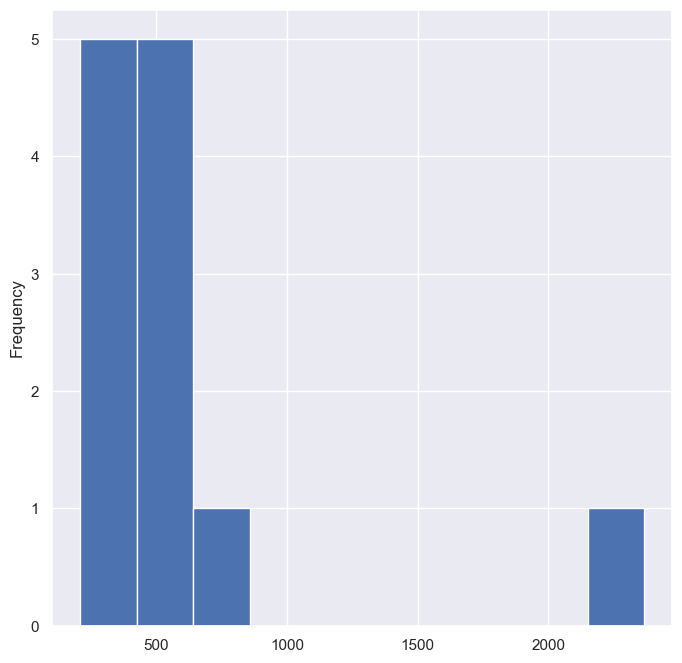

In [31]:
# Plotting value counts of column 'emp_length'

plt.figure(figsize = (8,8))
data['emp_length'].value_counts(dropna=False).plot(kind= 'hist')
plt.show()

### Inferences:

- For this column values seems categorical values, but they denotes the numerical type of data from column description.
- Here if we impute values using median it will change the distribution of values, hence choosing binning the column and addition of missing value as sublevel.

In [32]:
min_value = data['emp_length'].min()
max_value = data['emp_length'].max()
print(min_value)
print(max_value)

0.0
10.0


In [33]:

bins = np.linspace(min_value,max_value,4)
bins

array([ 0.        ,  3.33333333,  6.66666667, 10.        ])

In [34]:
labels = ['juior', 'mid-senior', 'senior']

In [35]:
data['emp_length'] = pd.cut(data['emp_length'], bins=bins, labels=labels, include_lowest=True)

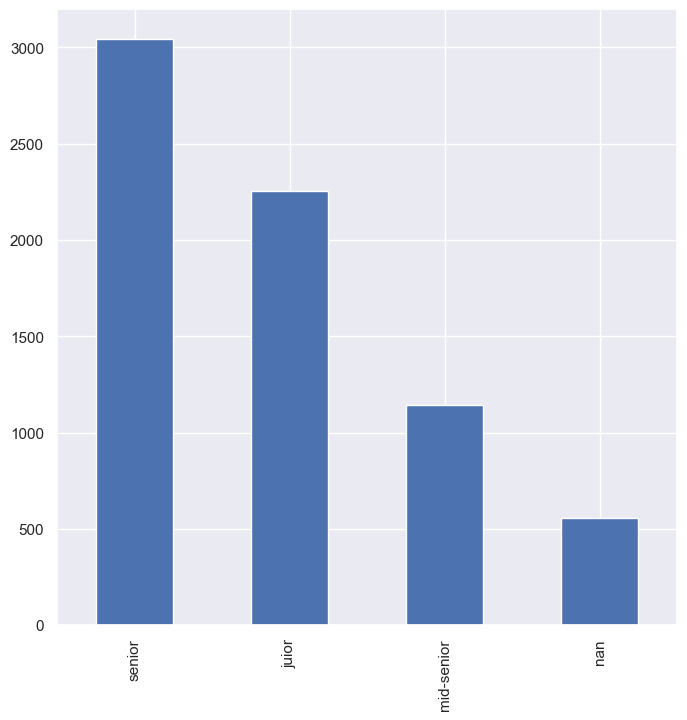

In [36]:
# Plotting value counts of column 'emp_length'

plt.figure(figsize = (8,8))
data['emp_length'].value_counts(dropna=False).plot(kind= 'bar')
plt.show()

In [37]:
data['emp_length'] = data['emp_length'].astype('object')
data['emp_length'] = data['emp_length'].replace(np.nan, 'missing')

In [38]:
# Checking missing values in column 'emp_length'

data['emp_length'].isnull().sum()

0

In [39]:
data.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method
0,juior,NY,RENT,45000.0,Source Verified,6.71,0,2011,0,5,4,9300,7743,0,0,0,0,0,0,NaN,4,0.0,0,3,7600,5,4,4,0,100.0,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash
1,senior,CA,RENT,68000.0,Source Verified,18.99,0,1971,1,14,5,44050,34712,0,1,0,0,2,3,3.0,5,0.0,0,2,16000,10,3,2,1,100.0,0,1,small_business,individual,7200,36,16.01,whole,Cash
2,senior,TN,OWN,15000.0,Source Verified,20.83,0,2007,1,9,5,19300,6502,0,0,0,0,0,1,1.0,5,0.0,0,4,19300,7,5,4,0,100.0,0,0,credit_card,individual,5000,36,11.99,whole,Cash
3,juior,OH,MORTGAGE,35000.0,Verified,35.56,0,2007,3,16,8,76236,36051,1,0,0,239,3,1,0.0,8,0.0,0,2,8000,6,4,3,1,93.8,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay
4,juior,UT,RENT,34000.0,Not Verified,13.20,0,2011,0,8,8,20577,18633,0,0,0,0,6,3,21.0,8,0.0,0,1,1000,2,2,2,0,100.0,0,0,credit_card,individual,1200,36,10.90,whole,Cash


In [40]:
#logging.info('Missing value Treatment for column emp_length is done')

### Missing value treatment for column- `debt_to_income`

- Column Description: Debt-to-income ratio

In [41]:
# Checking value count for column debt_to_income

data['debt_to_income'].value_counts(dropna= False)

0.00      19
NaN       14
16.11      9
19.42      9
20.66      9
11.50      8
15.23      8
18.36      8
14.40      8
12.13      8
15.84      8
14.08      7
23.52      7
15.48      7
13.14      7
10.87      7
17.08      7
17.83      7
5.81       7
13.20      7
20.25      7
21.48      7
17.35      7
19.44      7
20.48      7
11.96      7
13.68      7
21.60      7
12.91      7
18.57      7
15.95      7
14.60      7
18.92      7
16.77      6
11.30      6
13.71      6
19.36      6
16.17      6
20.45      6
17.28      6
13.89      6
15.92      6
10.29      6
13.08      6
14.37      6
18.24      6
7.02       6
25.14      6
8.83       6
17.18      6
17.52      6
19.26      6
11.21      6
21.28      6
8.24       6
19.97      6
16.13      6
14.31      6
29.67      6
9.71       6
15.50      6
20.19      6
20.82      6
16.50      6
20.55      6
14.20      6
10.94      6
24.99      6
16.79      6
10.91      6
21.05      6
12.04      6
11.07      6
11.63      6
19.71      6
10.67      6
22.26      6

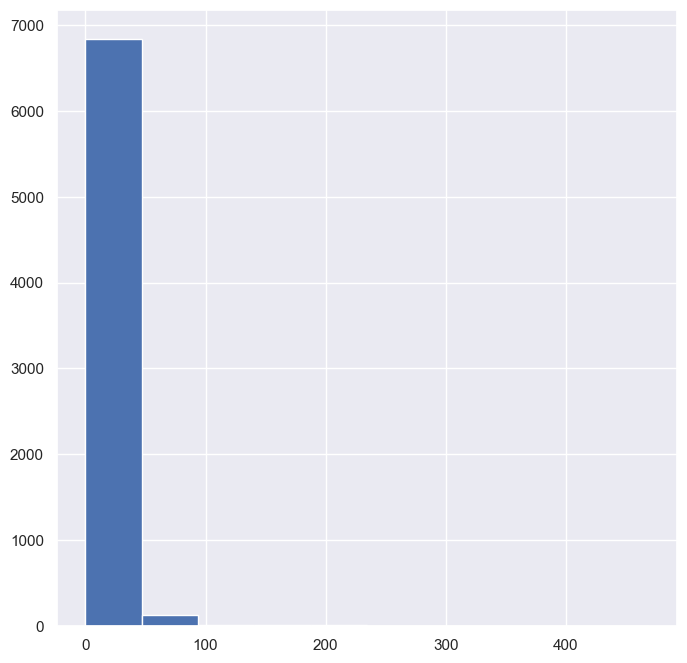

In [42]:
# Plotting histogram to check value distribution
plt.figure(figsize = (8,8))
plt.hist(data['debt_to_income'])
plt.show()

In [43]:
# Checking missing values in column 'debt_to_income'

data['debt_to_income'].isnull().sum()

14

In [44]:
# Replacing missing values from the column to median value of column as data is skewed

debt_to_income_med = data['debt_to_income'].median()

data['debt_to_income'] = data['debt_to_income'].replace(np.nan, debt_to_income_med)

In [45]:
# Checking missing values in column 'debt_to_income'

data['debt_to_income'].isnull().sum()

0

In [46]:
#logging.info('Missing value Treatment for column debt_to_income is done')

### Missing value treatment for column- `months_since_last_credit_inquiry`

- Column Description: Number of months since the last credit inquiry on this applicant.

In [47]:
# Checking value count for column months_since_last_credit_inquiry

data['months_since_last_credit_inquiry'].value_counts(dropna= False)

NaN     876
1.0     567
2.0     502
0.0     459
3.0     459
4.0     449
6.0     415
5.0     398
7.0     356
8.0     326
10.0    265
9.0     265
11.0    196
13.0    187
12.0    175
14.0    169
15.0    158
17.0    130
16.0    127
18.0    116
19.0    100
20.0     75
21.0     74
22.0     74
23.0     54
24.0     28
Name: months_since_last_credit_inquiry, dtype: int64

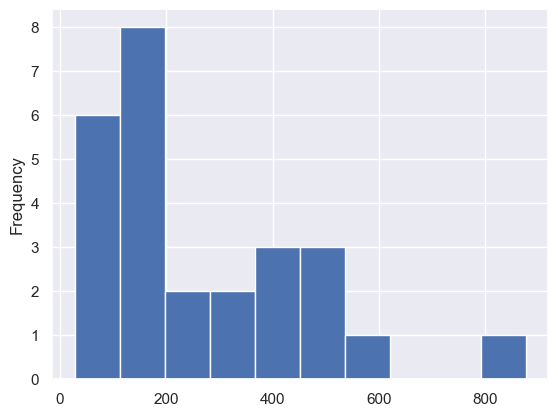

In [48]:
data['months_since_last_credit_inquiry'].value_counts(dropna= False).plot(kind='hist')
plt.show()

In [49]:
# Replacing missing value using median of column 'months_since_last_credit_inquiry'

min_value_mon = data['months_since_last_credit_inquiry'].min()
max_value_mon = data['months_since_last_credit_inquiry'].max()
print(min_value_mon)
print(max_value_mon)

0.0
24.0


In [50]:
bins = np.linspace(min_value_mon,max_value_mon,4)
bins

array([ 0.,  8., 16., 24.])

In [51]:
labels = ['0-8', '9-16', '17-24']

In [52]:


data['months_since_last_credit_inquiry'] = pd.cut(data['months_since_last_credit_inquiry'], bins=bins, labels=labels, include_lowest=True)

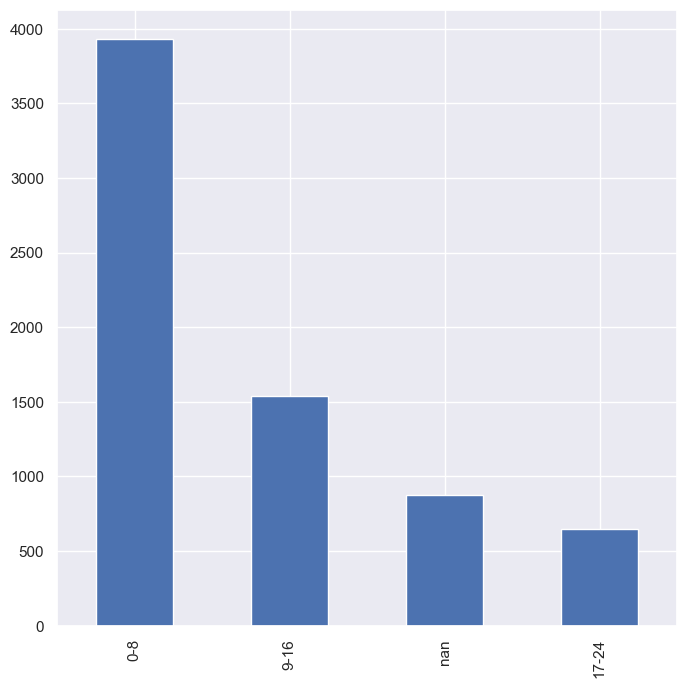

In [53]:
# Plotting value counts of column 'emp_length'

plt.figure(figsize = (8,8))
data['months_since_last_credit_inquiry'].value_counts(dropna=False).plot(kind= 'bar')
plt.show()

In [54]:
data['months_since_last_credit_inquiry'] = data['months_since_last_credit_inquiry'].astype('object')
data['months_since_last_credit_inquiry'] = data['months_since_last_credit_inquiry'].replace(np.nan, 'missing')

In [55]:
# Checking missing values in column 'emp_length'

data['months_since_last_credit_inquiry'].isnull().sum()

0

In [56]:
#logging.info('Missing value Treatment for column months_since_last_credit_inquiry is done')

### Missing value treatment for column- num_accounts_120d_past_due 

In [57]:
data['num_accounts_120d_past_due'].value_counts(dropna=False)

0.0    6783
NaN     217
Name: num_accounts_120d_past_due, dtype: int64

In [58]:
100*(data['num_accounts_120d_past_due'].value_counts(dropna=False)/data.shape[0])

0.0    96.9
NaN     3.1
Name: num_accounts_120d_past_due, dtype: float64

### Inferences:

- Here, 96.9% values are explained by 0.0 value hence dropping column - num_accounts_120d_past_due

In [59]:
data = data.drop('num_accounts_120d_past_due', axis= 1)

### Data Visualization

- Univariate analysis

In [60]:
# Checking dtypes of columns and their count

data_nums = data.select_dtypes(exclude='object')

# checking count of numerical columns

print(f'Numeric columns in dataframe: {len(data_nums.columns)}')
print()

# Checking numerical column name 
print(data_nums.columns)

Numeric columns in dataframe: 29

Index(['annual_income', 'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate'],
      dtype='object')


In [61]:
# Checking dtypes of columns and their count

data_cate = data.select_dtypes(include='object')

# checking count of categorical columns

print(f'Categorical columns in dataframe: {len(data_cate.columns)}')
print()

# Checking numerical column name 
print(data_cate.columns)

Categorical columns in dataframe: 9

Index(['emp_length', 'state', 'homeownership', 'verified_income',
       'months_since_last_credit_inquiry', 'loan_purpose', 'application_type',
       'initial_listing_status', 'disbursement_method'],
      dtype='object')


In [62]:
# Plotting numerical data
'''
plt.figure(figsize = (15,6))

for i in enumerate(data_nums):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(data_nums[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(data_nums[i[1]], rug = True,  color= 'Green')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(data_nums[i[1]], orient= 'vertical',  color= 'Green')
    
    plt.show()
'''


"\nplt.figure(figsize = (15,6))\n\nfor i in enumerate(data_nums):\n    f = plt.figure(figsize=(15,5))\n    ax = f.add_subplot(131)\n    sns.boxplot(data_nums[i[1]], color= 'Green')\n\n    ax1 = f.add_subplot(132)\n    sns.distplot(data_nums[i[1]], rug = True,  color= 'Green')\n    \n    ax2 = f.add_subplot(133)\n    sns.violinplot(data_nums[i[1]], orient= 'vertical',  color= 'Green')\n    \n    plt.show()\n"

In [63]:
'''
for i in enumerate(data_cate):
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    data_cate[i[1]].value_counts().plot.bar(color= 'Green',edgecolor='Black')

    ax1 = f.add_subplot(122)
    data_cate[i[1]].value_counts().plot.pie()
    
    plt.show()
'''


"\nfor i in enumerate(data_cate):\n    \n    f = plt.figure(figsize=(15,5))\n    ax = f.add_subplot(121)\n    data_cate[i[1]].value_counts().plot.bar(color= 'Green',edgecolor='Black')\n\n    ax1 = f.add_subplot(122)\n    data_cate[i[1]].value_counts().plot.pie()\n    \n    plt.show()\n"

In [64]:
for i in data_cate.columns:
    print(i)
    print(len(data[i].value_counts(dropna=False)))
    print()

emp_length
4

state
50

homeownership
3

verified_income
3

months_since_last_credit_inquiry
4

loan_purpose
12

application_type
2

initial_listing_status
2

disbursement_method
2



In [65]:
data.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method
0,juior,NY,RENT,45000.0,Source Verified,6.71,0,2011,0,5,4,9300,7743,0,0,0,0,0,0,missing,4,0,3,7600,5,4,4,0,100.0,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash
1,senior,CA,RENT,68000.0,Source Verified,18.99,0,1971,1,14,5,44050,34712,0,1,0,0,2,3,0-8,5,0,2,16000,10,3,2,1,100.0,0,1,small_business,individual,7200,36,16.01,whole,Cash
2,senior,TN,OWN,15000.0,Source Verified,20.83,0,2007,1,9,5,19300,6502,0,0,0,0,0,1,0-8,5,0,4,19300,7,5,4,0,100.0,0,0,credit_card,individual,5000,36,11.99,whole,Cash
3,juior,OH,MORTGAGE,35000.0,Verified,35.56,0,2007,3,16,8,76236,36051,1,0,0,239,3,1,0-8,8,0,2,8000,6,4,3,1,93.8,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay
4,juior,UT,RENT,34000.0,Not Verified,13.20,0,2011,0,8,8,20577,18633,0,0,0,0,6,3,17-24,8,0,1,1000,2,2,2,0,100.0,0,0,credit_card,individual,1200,36,10.90,whole,Cash


In [66]:
logging.info('Univariate analysis done')

### Outlier treatment

In [67]:
for i in data_nums.columns:
    print(i)
    print(data_nums[i].quantile([0.1,0.9,0.95,0.99]))
    print(data_nums[i].describe())
    print('\n')

annual_income
0.10     32000.0
0.90    137000.0
0.95    175000.0
0.99    300000.0
Name: annual_income, dtype: float64
count    7.000000e+03
mean     7.949433e+04
std      6.634772e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      2.300000e+06
Name: annual_income, dtype: float64


debt_to_income
0.10     6.139
0.90    32.611
0.95    37.171
0.99    57.961
Name: debt_to_income, dtype: float64
count    7000.000000
mean       19.257691
std        14.472647
min         0.000000
25%        11.060000
50%        17.540000
75%        24.990000
max       469.090000
Name: debt_to_income, dtype: float64


delinq_2y
0.10    0.0
0.90    1.0
0.95    1.0
0.99    3.0
Name: delinq_2y, dtype: float64
count    7000.000000
mean        0.218000
std         0.683875
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: delinq_2y, dtype: float64


earliest_credit_line
0.10    1990.0
0.90    2010.0
0.95  

count    7000.000000
mean       43.241143
std        11.016833
min        36.000000
25%        36.000000
50%        36.000000
75%        60.000000
max        60.000000
Name: term, dtype: float64


interest_rate
0.10     6.71
0.90    19.42
0.95    21.85
0.99    26.77
Name: interest_rate, dtype: float64
count    7000.00000
mean       12.47482
std         5.01296
min         5.31000
25%         9.43000
50%        11.98000
75%        15.05000
max        30.94000
Name: interest_rate, dtype: float64




In [68]:
data_nums.columns

Index(['annual_income', 'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate'],
      dtype='object')

In [69]:
quartile_1 = data['annual_income'].quantile(0.99)
data = data[data["annual_income"] < quartile_1]

In [70]:
data.shape

(6926, 38)

In [71]:
quartile_2 = data['debt_to_income'].quantile(0.99)
data = data[data["debt_to_income"] < quartile_2]

In [72]:
data.shape

(6856, 38)

In [73]:
quartile_3 = data['total_credit_limit'].quantile(0.99)
data = data[data["total_credit_limit"] < quartile_3]

In [74]:
data.shape

(6787, 38)

In [75]:
quartile_4 = data['total_credit_utilized'].quantile(0.99)
data = data[data["total_credit_utilized"] < quartile_4]

In [76]:
data.shape

(6719, 38)

In [77]:
#quartile_5 = data['tax_liens'].quantile(0.95)
#data = data[data["tax_liens"] < quartile_5]

In [78]:
data.shape

(6719, 38)

In [79]:
quartile_6 = data['total_collection_amount_ever'].quantile(0.99)
data = data[data["total_collection_amount_ever"] < quartile_6]

In [80]:
data.shape

(6651, 38)

In [81]:
quartile_7 = data['num_mort_accounts'].quantile(0.99)
data = data[data["num_mort_accounts"] < quartile_7]

In [82]:
data.shape

(6577, 38)

In [83]:
quartile_8 = data['num_active_debit_accounts'].quantile(0.99)
data = data[data["num_active_debit_accounts"] < quartile_8]

In [84]:
data.shape

(6480, 38)

In [85]:
quartile_9 = data['num_total_cc_accounts'].quantile(0.99)
data = data[data["num_total_cc_accounts"] < quartile_9]

In [86]:
data.shape

(6405, 38)

In [87]:
quartile_10 = data['num_historical_failed_to_pay'].quantile(0.99)
data = data[data["num_historical_failed_to_pay"] < quartile_10]

In [88]:
data.shape

(6325, 38)

### Feature Engineering


In [89]:
data.head(10)

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method
0,juior,NY,RENT,45000.0,Source Verified,6.71,0,2011,0,5,4,9300,7743,0,0,0,0,0,0,missing,4,0,3,7600,5,4,4,0,100.0,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash
1,senior,CA,RENT,68000.0,Source Verified,18.99,0,1971,1,14,5,44050,34712,0,1,0,0,2,3,0-8,5,0,2,16000,10,3,2,1,100.0,0,1,small_business,individual,7200,36,16.01,whole,Cash
2,senior,TN,OWN,15000.0,Source Verified,20.83,0,2007,1,9,5,19300,6502,0,0,0,0,0,1,0-8,5,0,4,19300,7,5,4,0,100.0,0,0,credit_card,individual,5000,36,11.99,whole,Cash
3,juior,OH,MORTGAGE,35000.0,Verified,35.56,0,2007,3,16,8,76236,36051,1,0,0,239,3,1,0-8,8,0,2,8000,6,4,3,1,93.8,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay
4,juior,UT,RENT,34000.0,Not Verified,13.20,0,2011,0,8,8,20577,18633,0,0,0,0,6,3,17-24,8,0,1,1000,2,2,2,0,100.0,0,0,credit_card,individual,1200,36,10.90,whole,Cash
5,juior,GA,MORTGAGE,50000.0,Verified,17.38,0,2005,2,24,11,49557,25633,0,1,0,619,2,9,0-8,11,0,3,17700,18,9,3,1,100.0,0,1,other,individual,6500,36,12.62,whole,Cash
6,mid-senior,CT,RENT,80500.0,Not Verified,22.63,0,2005,0,28,12,83671,66485,1,0,0,0,3,2,9-16,12,0,2,10600,13,7,4,0,67.9,0,0,other,individual,16000,60,26.30,whole,Cash
7,senior,CA,RENT,85000.0,Source Verified,22.33,0,2013,7,23,22,102080,67427,0,0,0,0,3,14,0-8,22,0,9,26300,19,19,14,0,100.0,0,0,debt_consolidation,individual,18000,36,14.08,whole,Cash
9,juior,CA,OWN,75000.0,Not Verified,36.96,0,2003,0,46,30,180063,87133,0,0,0,0,6,9,9-16,30,0,7,54400,30,24,16,0,100.0,0,0,debt_consolidation,individual,18000,36,11.99,whole,Cash
10,juior,TX,RENT,81000.0,Not Verified,32.35,0,1988,0,27,8,108555,67815,0,0,0,160,5,1,missing,8,0,2,13100,8,3,2,1,92.6,0,0,debt_consolidation,individual,25000,60,12.61,fractional,Cash


In [90]:
data_cate.columns

Index(['emp_length', 'state', 'homeownership', 'verified_income',
       'months_since_last_credit_inquiry', 'loan_purpose', 'application_type',
       'initial_listing_status', 'disbursement_method'],
      dtype='object')

In [91]:
for i in data_cate.columns:
    emp_length = pd.get_dummies(data[i], drop_first=True)
    data = pd.concat([data, emp_length], axis = 1)

In [92]:
data.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
0,juior,NY,RENT,45000.0,Source Verified,6.71,0,2011,0,5,4,9300,7743,0,0,0,0,0,0,missing,4,0,3,7600,5,4,4,0,100.0,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,senior,CA,RENT,68000.0,Source Verified,18.99,0,1971,1,14,5,44050,34712,0,1,0,0,2,3,0-8,5,0,2,16000,10,3,2,1,100.0,0,1,small_business,individual,7200,36,16.01,whole,Cash,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,senior,TN,OWN,15000.0,Source Verified,20.83,0,2007,1,9,5,19300,6502,0,0,0,0,0,1,0-8,5,0,4,19300,7,5,4,0,100.0,0,0,credit_card,individual,5000,36,11.99,whole,Cash,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,juior,OH,MORTGAGE,35000.0,Verified,35.56,0,2007,3,16,8,76236,36051,1,0,0,239,3,1,0-8,8,0,2,8000,6,4,3,1,93.8,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,juior,UT,RENT,34000.0,Not Verified,13.20,0,2011,0,8,8,20577,18633,0,0,0,0,6,3,17-24,8,0,1,1000,2,2,2,0,100.0,0,0,credit_card,individual,1200,36,10.90,whole,Cash,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [93]:
data = data.drop(data_cate, axis= 1)

In [94]:
data.head()

,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
0,45000.0,6.71,0,2011,0,5,4,9300,7743,0,0,0,0,0,0,4,0,3,7600,5,4,4,0,100.0,0,0,12000,60,19.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,68000.0,18.99,0,1971,1,14,5,44050,34712,0,1,0,0,2,3,5,0,2,16000,10,3,2,1,100.0,0,1,7200,36,16.01,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,15000.0,20.83,0,2007,1,9,5,19300,6502,0,0,0,0,0,1,5,0,4,19300,7,5,4,0,100.0,0,0,5000,36,11.99,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,35000.0,35.56,0,2007,3,16,8,76236,36051,1,0,0,239,3,1,8,0,2,8000,6,4,3,1,93.8,0,0,12800,60,23.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,34000.0,13.20,0,2011,0,8,8,20577,18633,0,0,0,0,6,3,8,0,1,1000,2,2,2,0,100.0,0,0,1200,36,10.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [95]:
data = data.drop('earliest_credit_line', axis= 1)

In [96]:
data.head()

,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
0,45000.0,6.71,0,0,5,4,9300,7743,0,0,0,0,0,0,4,0,3,7600,5,4,4,0,100.0,0,0,12000,60,19.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,68000.0,18.99,0,1,14,5,44050,34712,0,1,0,0,2,3,5,0,2,16000,10,3,2,1,100.0,0,1,7200,36,16.01,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,15000.0,20.83,0,1,9,5,19300,6502,0,0,0,0,0,1,5,0,4,19300,7,5,4,0,100.0,0,0,5000,36,11.99,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,35000.0,35.56,0,3,16,8,76236,36051,1,0,0,239,3,1,8,0,2,8000,6,4,3,1,93.8,0,0,12800,60,23.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,34000.0,13.20,0,0,8,8,20577,18633,0,0,0,0,6,3,8,0,1,1000,2,2,2,0,100.0,0,0,1200,36,10.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [97]:
# Checking correlation
#plt.figure(figsize=(18,18))
#sns.heatmap(data.corr(),annot = True, cmap='Greens')

In [98]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print()
print(get_top_abs_correlations(data, 3))

Top Absolute Correlations

current_accounts_delinq       num_accounts_30d_past_due    1.000000
open_credit_lines             num_satisfactory_accounts    0.999467
num_historical_failed_to_pay  public_record_bankrupt       0.942232
dtype: float64


In [99]:
data = data.drop(['num_open_cc_accounts', 'open_credit_lines', 'num_satisfactory_accounts'], axis=1)

In [100]:
data.head()

,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
0,45000.0,6.71,0,0,5,9300,7743,0,0,0,0,0,0,0,3,7600,5,4,0,100.0,0,0,12000,60,19.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,68000.0,18.99,0,1,14,44050,34712,0,1,0,0,2,3,0,2,16000,10,2,1,100.0,0,1,7200,36,16.01,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,15000.0,20.83,0,1,9,19300,6502,0,0,0,0,0,1,0,4,19300,7,4,0,100.0,0,0,5000,36,11.99,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,35000.0,35.56,0,3,16,76236,36051,1,0,0,239,3,1,0,2,8000,6,3,1,93.8,0,0,12800,60,23.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,34000.0,13.20,0,0,8,20577,18633,0,0,0,0,6,3,0,1,1000,2,2,0,100.0,0,0,1200,36,10.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [101]:
data.shape

(6325, 98)

### Data Pre-Processing

In [102]:
# Train-test split

from sklearn.model_selection import train_test_split

In [103]:
# Splitting dataset into train and test with train size 0.7

df_train, df_test = train_test_split(data, train_size = 0.75, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(4743, 98)
(1582, 98)


In [104]:
# Checking numerical columns for scaling.

df_train.describe()

,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.00000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
mean,72621.928299,18.532741,0.213789,1.889943,21.410078,162300.950032,44991.403542,0.013072,0.137887,0.000211,101.327852,2.613957,4.233186,0.000211,3.388573,24784.661185,12.190808,4.945182,1.243095,94.470209,0.012439,0.125448,15881.261860,43.316888,12.590474,0.167615,0.078010,0.426102,0.012861,0.008433,0.024457,0.135779,0.023825,0.017289,0.001476,0.001898,0.077799,0.035210,0.003373,0.004006,0.037740,0.019397,0.009909,0.009699,0.009488,0.023614,0.02256,0.002319,0.024246,0.017289,0.016445,0.006325,0.001265,0.030782,0.001476,0.006536,0.004217,0.032047,0.004638,0.015391,0.079486,0.033101,0.008855,0.012650,0.031836,0.004217,0.015391,0.002319,0.015180,0.077166,0.005060,0.022981,0.002319,0.024457,0.012229,0.005060,0.001687,0.129665,0.396795,0.404385,0.227282,0.096353,0.222011,0.129876,0.229812,0.515075,0.064938,0.013494,0.030150,0.014548,0.006747,0.087919,0.001476,0.014126,0.006325,0.143791,0.813620,0.071685
std,40420.585133,10.093341,0.667246,2.336449,10.784764,148027.426580,38048.089212,0.127585,0.344818,0.014520,409.107546,2.919999,3.065711,0.014520,2.077721,22952.561760,6.810385,2.906157,1.498256,9.287564,0.110848,0.331261,10049.745132,11.049625,5.056856,0.373564,0.268215,0.494561,0.112687,0.091456,0.154480,0.342590,0.152518,0.130358,0.038393,0.043524,0.267883,0.184329,0.057989,0.063172,0.190586,0.137930,0.099062,0.098013,0.096952,0.151858,0.14851,0.048107,0.153829,0.130358,0.127194,0.079287,0.035548,0.172745,0.038393,0.080589,0.064806,0.176144,0.067955,0.123115,0.270524,0.178920,0.093694,0.111771,0.175583,0.064806,0.123115,0.048107,0.122282,0.266883,0.070962,0.149859,0.048107,0.154480,0.109916,0.070962,0.041039,0.335970,0.489284,0.490824,0.419121,0.295105,0.415643,0.336202,0.420756,0.499825,0.246442,0.115388,0.171017,0.119746,0.081870,0.283207,0.038393,0.118023,0.079287,0.350915,0.389454,0.257992
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [105]:
df_test.describe()

,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.0,1582.00000,1582.000000,1582.000000,1582.0,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.00000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.00000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000
mean,74669.150341,18.053363,0.218710,1.852718,21.548673,165718.552465,45693.597977,0.011378,0.132743,0.0,81.19469,2.549937,4.269912,0.0,3.372314,25906.295828,12.393173,4.951960,1.241466,94.461441,0.016435,0.116308,15839.617573,42.735777,12.321833,0.160556,0.077750,0.433628,0.008850,0.006321,0.029077,0.120101,0.016435,0.02402,0.002528,0.003793,0.079014,0.041719,0.003793,0.003793,0.032870,0.021492,0.006953,0.006953,0.008217,0.02402,0.025284,0.001264,0.023388,0.014539,0.018963,0.008217,0.001896,0.030341,0.001264,0.005689,0.002528,0.035398,0.001896,0.010746,0.077750,0.029709,0.005057,0.013274,0.026549,0.006953,0.010746,0.003161,0.023388,0.084703,0.003793,0.033502,0.002528,0.032870,0.013274,0.008217,0.001264,0.135272,0.417193,0.429204,0.212389,0.098609,0.221871,0.135272,0.234513,0.495575,0.069532,0.015803,0.030973,0.018331,0.011378,0.099241,0.000632,0.008850,0.005689,0.141593,0.821745,0.076485
std,42471.849162,9.785218,0.699836,2.280002,10.971925,150225.663134,38378.296432,0.106093,0.339404,0.0,354.81639,2.700945,2.983377,0.0,2.074469,22539.113460,6.963329,2.951039,1.517713,9.550289,0.127181,0.320696,10223.855136,10.787099,4.945781,0.367237,0.267862,0.495732,0.093685,0.079279,0.168076,0.325183,0.127181,0.15316,0.050236,0.061487,0.269846,0.200010,0.061487,0.061487,0.178352,0.145063,0.083122,0.083122,0.090305,0.15316,0.157037,0.035545,0.151181,0.119734,0.136439,0.090305,0.043519,0.171579,0.035545,0.075234,0.050236,0.184843,0.043519,0.103137,0.267862,0.169838,0.070954,0.114483,0.160811,0.083122,0.103137,0.056148,0.151181,0.278527,0.061487,0.180000,0.050236,0.178352,0.114483,0.090305,0.035545,0.342122,0.493251,0.495119,0.409128,0.298231,0.415636,0.342122,0.423828,0.500139,0.254437,0.124751,0.173301,0.134189,0.106093,0.299080,0.025142,0.093685,0.075234,0.348742,0.382849,0.265857
min,0.000000,0.000000,0.000000,0.000000,2.000000,500.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.

### Feature Scaling

In [106]:
# Importing Sklearn library for scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [107]:
# Instantiate an object

scaler = MinMaxScaler()

df_train_sc = scaler.fit_transform(df_train)

df_test_sc = scaler.transform(df_test)

In [108]:
df_train_sc = pd.DataFrame(df_train_sc, columns = df_train.columns)
df_train_sc.head()

,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
0,0.581035,0.231194,0.0,0.250000,0.259259,0.172667,0.298467,0.0,0.0,0.0,0.0,0.090909,0.538462,0.0,0.5,0.278313,0.424242,0.28,0.000000,0.942667,0.0,0.0,0.282051,0.0,0.219780,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.190220,0.328675,0.0,0.041667,0.222222,0.191794,0.159655,0.0,0.0,0.0,0.0,0.060606,0.269231,0.0,0.4,0.071985,0.303030,0.20,0.333333,1.000000,0.0,0.0,0.205128,0.0,0.030220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.224805,0.045894,0.0,0.083333,0.320988,0.428294,0.029473,0.0,0.0,0.0,0.0,0.000000,0.192308,0.0,0.3,0.188904,0.575758,0.20,0.500000,0.952000,0.0,0.0,0.589744,1.0,0.080063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.473821,0.033816,0.0,0.125000,0.283951,0.244497,0.032666,0.0,0.0,0.0,0.0,0.000000,0.230769,0.0,0.9,0.840440,0.636364,0.40,0.000000,1.000000,0.0,0.0,0.076923,0.0,0.080063,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.328562,0.463078,0.0,0.250000,0.432099,0.136610,0.198415,0.0,1.0,0.0,0.0,0.242424,0.269231,0.0,0.6,0.160477,0.454545,0.28,0.000000,1.000000,0.0,1.0,0.487179,1.0,0.382261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
df_test_sc = pd.DataFrame(df_test_sc, columns = df_test.columns)
df_test_sc.head()

,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
0,0.363147,0.295031,0.076923,0.041667,0.234568,0.586761,0.296873,0.0,1.0,0.0,0.0,0.090909,0.153846,0.0,0.4,0.182027,0.333333,0.16,0.333333,0.936000,0.0,1.0,0.589744,0.0,0.161695,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.276684,0.386128,0.000000,0.208333,0.666667,0.329873,0.938794,0.0,1.0,0.0,0.0,0.212121,0.346154,0.0,0.6,0.248051,0.969697,0.44,0.166667,1.000000,0.0,1.0,0.179487,0.0,0.104396,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.587953,0.082298,0.076923,0.000000,0.370370,0.091866,0.201120,0.0,0.0,0.0,0.0,0.030303,0.192308,0.0,0.9,0.157267,0.727273,0.48,0.166667,0.625333,0.0,0.0,1.000000,1.0,0.261774,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.209225,0.469979,0.000000,0.125000,0.432099,0.431106,0.229747,0.0,1.0,0.0,0.0,0.060606,0.500000,0.0,0.4,0.157726,0.666667,0.20,0.333333,1.000000,0.0,1.0,0.102564,0.0,0.161695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.249015,0.075914,0.000000,0.041667,0.123457,0.028120,0.033436,0.0,0.0,0.0,0.0,0.030303,0.153846,0.0,0.4,0.077946,0.242424,0.20,0.000000,1.000000,0.0,0.0,0.051282,0.0,0.079670,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Defining X_train & y_train for model building

In [110]:
# Defining the X_train, y_train

y_train_sc = df_train_sc['interest_rate']
X_train_sc = df_train_sc.drop('interest_rate',axis=1)

y_test_sc = df_test_sc['interest_rate']
X_test_sc = df_test_sc.drop('interest_rate',axis=1)

In [111]:
X_train_sc.head()

,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
0,0.581035,0.231194,0.0,0.250000,0.259259,0.172667,0.298467,0.0,0.0,0.0,0.0,0.090909,0.538462,0.0,0.5,0.278313,0.424242,0.28,0.000000,0.942667,0.0,0.0,0.282051,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.190220,0.328675,0.0,0.041667,0.222222,0.191794,0.159655,0.0,0.0,0.0,0.0,0.060606,0.269231,0.0,0.4,0.071985,0.303030,0.20,0.333333,1.000000,0.0,0.0,0.205128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.224805,0.045894,0.0,0.083333,0.320988,0.428294,0.029473,0.0,0.0,0.0,0.0,0.000000,0.192308,0.0,0.3,0.188904,0.575758,0.20,0.500000,0.952000,0.0,0.0,0.589744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.473821,0.033816,0.0,0.125000,0.283951,0.244497,0.032666,0.0,0.0,0.0,0.0,0.000000,0.230769,0.0,0.9,0.840440,0.636364,0.40,0.000000,1.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.328562,0.463078,0.0,0.250000,0.432099,0.136610,0.198415,0.0,1.0,0.0,0.0,0.242424,0.269231,0.0,0.6,0.160477,0.454545,0.28,0.000000,1.000000,0.0,1.0,0.487179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
y_train_sc.head()

0    0.219780
1    0.030220
2    0.080063
3    0.080063
4    0.382261
Name: interest_rate, dtype: float64

#### Linear Regression
- Fitting a regression line through the training data using statsmodels. by default, statsmodels fit a regression line passing through the origin. So adding a constant to explicitly fit using sm.add_constant(X).

In [113]:
# Importng statsmodels library for api

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [114]:
# Linear model for X_train

X_train_lr = sm.add_constant(X_train_sc)

X_train_lr.head()

,const,annual_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,mid-senior,missing,senior,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,OWN,RENT,Source Verified,Verified,17-24,9-16,missing,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,joint,whole,DirectPay
0,1.0,0.581035,0.231194,0.0,0.250000,0.259259,0.172667,0.298467,0.0,0.0,0.0,0.0,0.090909,0.538462,0.0,0.5,0.278313,0.424242,0.28,0.000000,0.942667,0.0,0.0,0.282051,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.190220,0.328675,0.0,0.041667,0.222222,0.191794,0.159655,0.0,0.0,0.0,0.0,0.060606,0.269231,0.0,0.4,0.071985,0.303030,0.20,0.333333,1.000000,0.0,0.0,0.205128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.224805,0.045894,0.0,0.083333,0.320988,0.428294,0.029473,0.0,0.0,0.0,0.0,0.000000,0.192308,0.0,0.3,0.188904,0.575758,0.20,0.500000,0.952000,0.0,0.0,0.589744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.473821,0.033816,0.0,0.125000,0.283951,0.244497,0.032666,0.0,0.0,0.0,0.0,0.000000,0.230769,0.0,0.9,0.840440,0.636364,0.40,0.000000,1.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.328562,0.463078,0.0,0.250000,0.432099,0.136610,0.198415,0.0,1.0,0.0,0.0,0.242424,0.269231,0.0,0.6,0.160477,0.454545,0.28,0.000000,1.000000,0.0,1.0,0.487179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
# Checking dimensions of y_train

y_train_sc.shape

(4743,)

In [116]:
# Training OLS model

lr_sm = sm.OLS(y_train_sc,X_train_lr).fit()

In [117]:
# Checking p-values

round(lr_sm.pvalues,4)

const                           0.0000
annual_income                   0.4544
debt_to_income                  0.0000
delinq_2y                       0.0000
inquiries_last_12m              0.0025
total_credit_lines              0.1685
total_credit_limit              0.0000
total_credit_utilized           0.0000
num_collections_last_12m        0.3077
num_historical_failed_to_pay    0.0830
current_accounts_delinq         0.5778
total_collection_amount_ever    0.0058
current_installment_accounts    0.0001
accounts_opened_24m             0.0000
num_accounts_30d_past_due       0.5778
num_active_debit_accounts       0.0014
total_debit_limit               0.0000
num_total_cc_accounts           0.0001
num_cc_carrying_balance         0.0002
num_mort_accounts               0.0002
account_never_delinq_percent    0.0000
tax_liens                       0.0485
public_record_bankrupt          0.0753
loan_amount                     0.7230
term                            0.0000
mid-senior               

In [119]:
#Backward Elimination 
'''
cols = list(X_train_sc.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_sc[cols]
    X_1 = sm.add_constant(X_1)
    lr = sm.OLS(y_train_sc,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)   
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)
'''


'\ncols = list(X_train_sc.columns)\npmax = 1\nwhile (len(cols)>0):\n    p= []\n    X_1 = X_train_sc[cols]\n    X_1 = sm.add_constant(X_1)\n    lr = sm.OLS(y_train_sc,X_1).fit()\n    p = pd.Series(lr.pvalues.values[1:],index = cols)   \n    pmax = max(p)\n    feature_with_p_max = p.idxmax()\n    if(pmax>0.05):\n        cols.remove(feature_with_p_max)\n    else:\n        break\n        \nselected_features_BE = cols\nprint(selected_features_BE)\n'

In [120]:
# Training X_train and y_train with selected features

X_train_be = X_train_sc #[selected_features_BE]
X_test_be = X_test_sc #[selected_features_BE]

In [121]:
# Building a linear regression model
lr = LinearRegression()

# Fitting
lr.fit(X_train_be,y_train_sc)

# Predictions
y_pred_train_be = lr.predict(X_train_be)

y_pred_test_be = lr.predict(X_test_be)

In [122]:
# Check R2 score, rmse

from sklearn.metrics import r2_score,mean_squared_error

In [123]:
# Function for adjusted r2_score

def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [124]:
# Function for rmse

def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [125]:
#Evaluation 

print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_be))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_be))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_be))

R2 score of train data is  0.4233822987178004
Adj. R2 score of train data is  0.41134098181266077
rmse score of train data is  0.15068825211168824

R2 score of test data is  0.40877780318995893
Adj. R2 score of test data is  0.37013322563566375
rmse score of test data is  0.14920162791219085


In [126]:
#Storing results

results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression_BE',r2_score(y_train_sc,y_pred_train_be),
                             adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be),
                             rmse(y_train_sc,y_pred_train_be),r2_score(y_test_sc,y_pred_test_be),
                             adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be),rmse(y_test_sc,y_pred_test_be)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.423382,0.411341,0.150688,0.408778,0.370133,0.149202


### Feature selection using RFE ( Recursive Feature Elimination)

In [127]:
from sklearn.feature_selection import RFE

# Features

features = X_train_sc.columns.tolist()

nof_list = np.arange(1,len(features)+1)   

high_score=0

# Variable to store the optimum features

nof=0  

score_list =[]

for n in range(len(nof_list)):
    
    lr = LinearRegression()
    rfe = RFE(lr,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_sc,y_train_sc)
    X_test_rfe = rfe.transform(X_test_sc)
    lr.fit(X_train_rfe,y_train_sc)
    score = lr.score(X_test_rfe,y_test_sc)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 44
Score with 44 features: 0.412287


In [128]:
#RFE with features

lr = LinearRegression()

rfe = RFE(lr,n_features_to_select=nof)

X_train_rfe = rfe.fit_transform(X_train_sc,y_train_sc)

X_test_rfe = rfe.transform(X_test_sc)

#Fitting the data to model

lr.fit(X_train_rfe,y_train_sc)  

temp = pd.Series(rfe.support_,index = features)

selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['debt_to_income', 'delinq_2y', 'inquiries_last_12m',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'term', 'AR', 'CT', 'DC',
       'HI', 'LA', 'ME', 'MS', 'MT', 'ND', 'NY', 'OR', 'SD', 'UT', 'VT',
       'Source Verified', 'Verified', 'missing', 'debt_consolidation', 'house',
       'medical', 'moving', 'small_business', 'vacation', 'whole',
       'DirectPay'],
      dtype='object')


In [129]:
# predictions
y_pred_train_rfe = lr.predict(X_train_rfe)
y_pred_test_rfe = lr.predict(X_test_rfe)

In [130]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_rfe))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_rfe))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_rfe))

R2 score of train data is  0.4169048985385929
Adj. R2 score of train data is  0.4114438120200101
rmse score of train data is  0.1515322621442643

R2 score of test data is  0.41228723538302237
Adj. R2 score of test data is  0.3954626669749892
rmse score of test data is  0.14875814630608772


In [131]:
#Storing results
results.loc[len(results)] = ['Linear Regression_RFE',r2_score(y_train_sc,y_pred_train_rfe),
                             adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe),
                             rmse(y_train_sc,y_pred_train_rfe),r2_score(y_test_sc,y_pred_test_rfe),
                             adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe),rmse(y_test_sc,y_pred_test_rfe)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.423382,0.411341,0.150688,0.408778,0.370133,0.149202
1,Linear Regression_RFE,0.416905,0.411444,0.151532,0.412287,0.395463,0.148758


### Feature selection using Lasso CV

In [132]:
# Using Lasso regression CV

from sklearn.linear_model import LassoCV

reg = LassoCV()

reg.fit(X_train_sc, y_train_sc)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

print("Best score using built-in LassoCV: %f" %reg.score(X_train_sc,y_train_sc))

coef = pd.Series(reg.coef_, index = X_train_sc.columns)

Best alpha using built-in LassoCV: 0.000169
Best score using built-in LassoCV: 0.419174


In [133]:
#Feature importance by Lasso
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 59 variables and eliminated the other 38 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

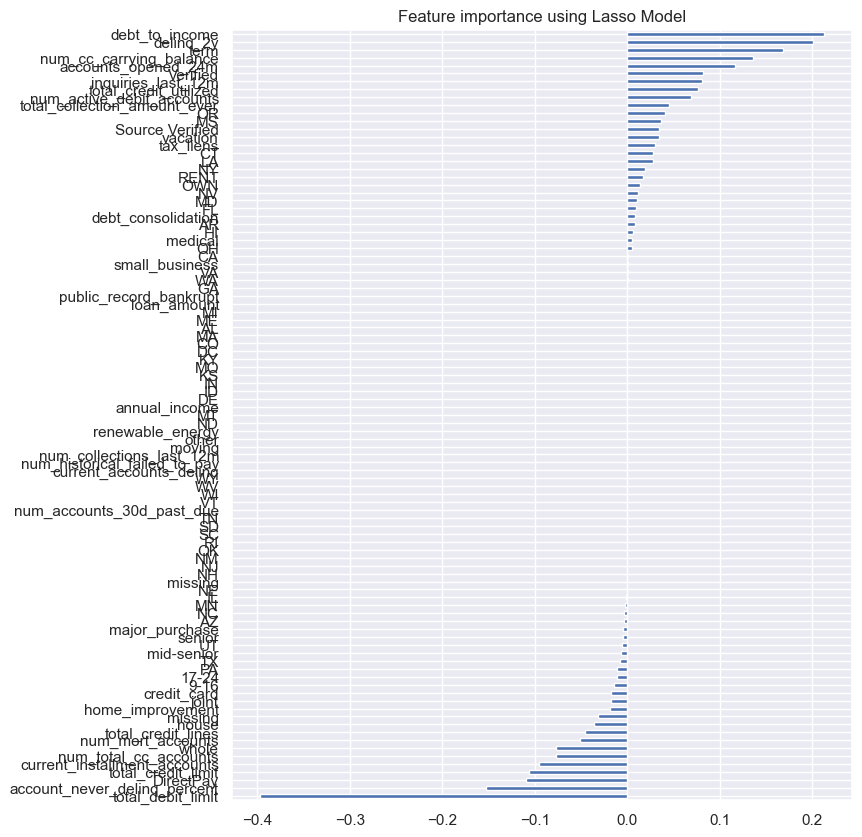

In [134]:
#Visualization

imp_coef_lasso = coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_coef_lasso.plot(kind = "barh")

plt.title("Feature importance using Lasso Model")

In [135]:
features_by_lasso = imp_coef_lasso

In [136]:
#predictions on train data

y_pred_train_ls = reg.predict(X_train_sc)

#predictions on test data

y_pred_test_ls = reg.predict(X_test_sc)

In [137]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ls))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ls))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ls))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ls))

R2 score of train data is  0.41917407421079955
Adj. R2 score of train data is  0.4070448783439422
rmse score of train data is  0.15123712288671984

R2 score of test data is  0.41576766826563305
Adj. R2 score of test data is  0.3775799754231576
rmse score of test data is  0.14831701964444485


In [138]:
results.loc[len(results)] = ['Linear Regression_Lasso',r2_score(y_train_sc,y_pred_train_ls),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls),
                             rmse(y_train_sc,y_pred_train_ls),r2_score(y_test_sc,y_pred_test_ls),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls),rmse(y_test_sc,y_pred_test_ls)]

results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.423382,0.411341,0.150688,0.408778,0.370133,0.149202
1,Linear Regression_RFE,0.416905,0.411444,0.151532,0.412287,0.395463,0.148758
2,Linear Regression_Lasso,0.419174,0.407045,0.151237,0.415768,0.377580,0.148317


In [139]:
from sklearn.linear_model import ElasticNetCV

# Instantiating ElasticNetCV
ECV = ElasticNetCV() 

# fitting on the training data
ECV.fit(X_train_sc, y_train_sc)  

# feature importance by ElasticNetCV
Coef = pd.Series(ECV.coef_, index=X_train_sc.columns)  

imp_Coef_elastic = Coef.sort_values(ascending=False)

Text(0.5, 1.0, 'Feature importance using ElasticNetCV Model')

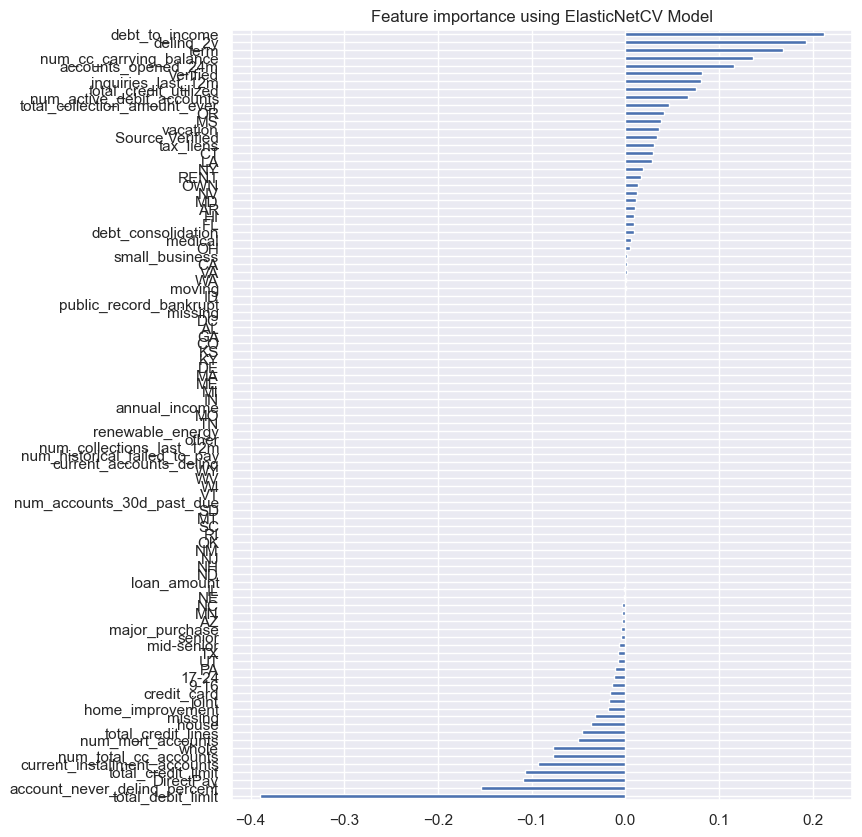

In [140]:
#Visualization

imp_Coef_elastic = Coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_Coef_elastic.plot(kind = "barh")

plt.title("Feature importance using ElasticNetCV Model")

In [141]:
features_by_ECV = imp_Coef_elastic

In [142]:
# predictions on the data
y_pred_train_ECV = ECV.predict(X_train_sc)  
y_pred_test_ECV = ECV.predict(X_test_sc) 

In [143]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ECV))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ECV))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ECV))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ECV))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ECV))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ECV))

R2 score of train data is  0.419211812185883
Adj. R2 score of train data is  0.4070834043886883
rmse score of train data is  0.1512322096457373

R2 score of test data is  0.4155407754194065
Adj. R2 score of test data is  0.3773382519798394
rmse score of test data is  0.14834581709560643


In [144]:
results.loc[len(results)] = ['Linear Regression_ElasticNetCV',
                             r2_score(y_train_sc,y_pred_train_ECV),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ECV),
                             rmse(y_train_sc,y_pred_train_ECV),
                             r2_score(y_test_sc,y_pred_test_ECV),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ECV),
                             rmse(y_test_sc,y_pred_test_ECV)]

results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.423382,0.411341,0.150688,0.408778,0.370133,0.149202
1,Linear Regression_RFE,0.416905,0.411444,0.151532,0.412287,0.395463,0.148758
2,Linear Regression_Lasso,0.419174,0.407045,0.151237,0.415768,0.377580,0.148317
3,Linear Regression_ElasticNetCV,0.419212,0.407083,0.151232,0.415541,0.377338,0.148346


### Residual Analysis

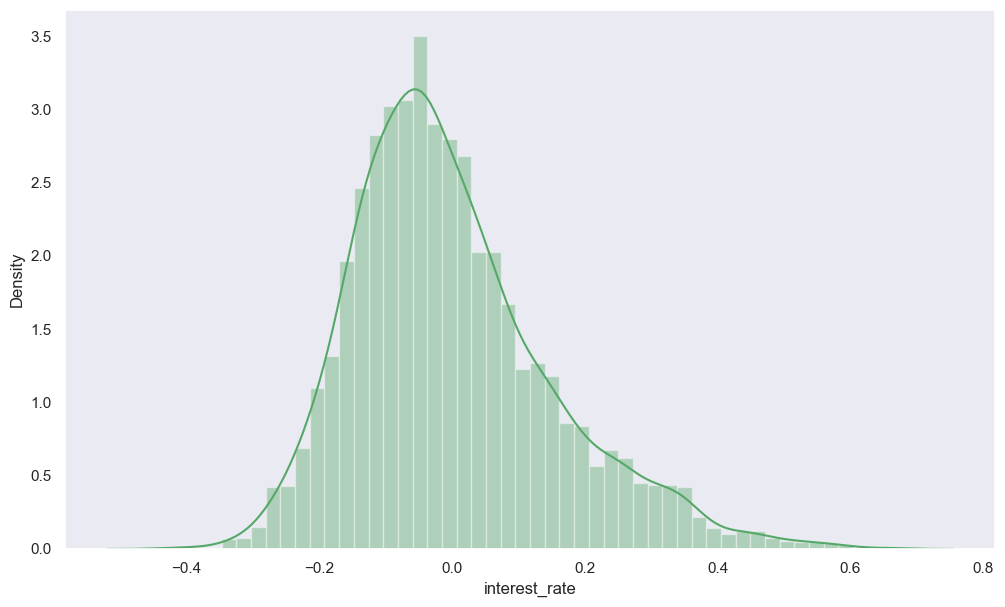

In [145]:
# check how error terms are distributed on train data
y_res = y_train_sc - y_pred_train_rfe
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

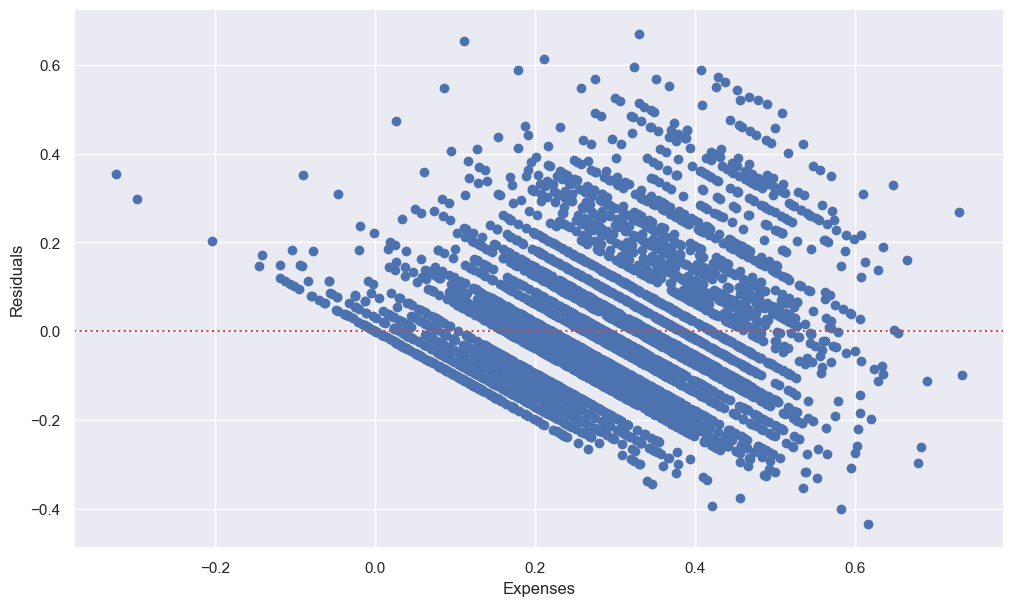

In [146]:
# residual vs predicitons plot

plt.figure(figsize=(12,7))
plt.scatter(y_pred_train_rfe, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Expenses")
plt.ylabel("Residuals")
plt.show()

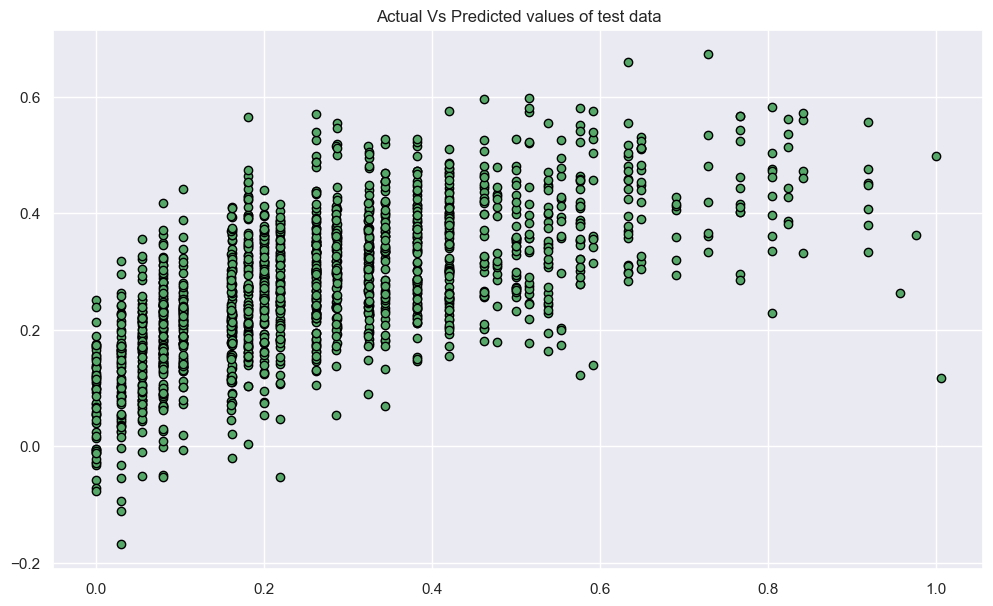

In [147]:
#actual test values vs predicted test values

plt.figure(figsize=(12,7))
plt.title('Actual Vs Predicted values of test data')
plt.scatter(y_test_sc, y_pred_test_rfe, color='g', edgecolor = 'Black')
plt.show()

### Decision Tree Regressor

In [148]:
# Importing decision tree regressor

from sklearn.tree import DecisionTreeRegressor

In [149]:
# Instantiating DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [152]:
# Splitting data set

y = data['interest_rate']
X = data.drop('interest_rate',axis=1)

In [153]:
#Train-test-split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42, shuffle = True)

print('The shapes of X_train = {0}, y_train = {1}, X_test = {2},y_test = {3}'.format(X_train.shape,
                                                                                     y_train.shape,
                                                                                     X_test.shape,
                                                                                     y_test.shape))

The shapes of X_train = (4427, 97), y_train = (4427,), X_test = (1898, 97),y_test = (1898,)


In [154]:
# Importing Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10]}

# randomized search cv

RCV = RandomizedSearchCV(estimator=dt, 
                         param_distributions=params, 
                         n_iter = 10,  
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [155]:
# Best estimator
RCV.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                      min_samples_split=8)

In [156]:
# Best parameters
RCV.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_depth': 5,
 'criterion': 'mse'}

In [157]:
# Based on the above parameters, let's build a decision tree regressor

dt1 = RCV.best_estimator_
dt1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                      min_samples_split=8)

In [158]:
# Feature importance

dt1.feature_importances_

array([0.        , 0.12615368, 0.        , 0.00394705, 0.        ,
       0.01881256, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00443859, 0.02184671, 0.        , 0.01274612,
       0.2855391 , 0.00576958, 0.02559646, 0.01199861, 0.        ,
       0.        , 0.        , 0.        , 0.34585053, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [159]:
dt1_feature_imp = pd.DataFrame(dt1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])

dt1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace=True)

dt1_feature_imp

,Feature_importance
term,0.345851
total_debit_limit,0.285539
debt_to_income,0.126154
whole,0.094383
num_cc_carrying_balance,0.025596
DirectPay,0.024473
accounts_opened_24m,0.021847
total_credit_limit,0.018813
Verified,0.018444
num_active_debit_accounts,0.012746


In [160]:
dt1_feature_imp['Feature_importance'] = dt1_feature_imp[dt1_feature_imp['Feature_importance'] > 0.0001] 

dt1_feature_imp = dt1_feature_imp[dt1_feature_imp['Feature_importance'].notna()]

dt1_feature_imp

,Feature_importance
term,0.345851
total_debit_limit,0.285539
debt_to_income,0.126154
whole,0.094383
num_cc_carrying_balance,0.025596
DirectPay,0.024473
accounts_opened_24m,0.021847
total_credit_limit,0.018813
Verified,0.018444
num_active_debit_accounts,0.012746


In [161]:
top_features_dt1 = dt1_feature_imp.index

In [162]:
# Instantiating

dt2 = DecisionTreeRegressor()

#Considering only the above features

X_train_dt = X_train[top_features_dt1]

X_test_dt = X_test[top_features_dt1]

In [163]:
X_train_dt.head()

,term,total_debit_limit,debt_to_income,whole,num_cc_carrying_balance,DirectPay,accounts_opened_24m,total_credit_limit,Verified,num_active_debit_accounts,num_mort_accounts,num_total_cc_accounts,current_installment_accounts,inquiries_last_12m
330,36,52000,12.90,1,4,0,4,538978,0,4,3,16,3,1
5065,60,21300,25.49,1,5,0,3,632324,0,3,1,9,4,10
205,60,5100,22.19,1,3,0,8,31276,0,2,0,10,2,0
6125,36,19800,15.18,1,4,0,2,26664,0,4,0,5,1,1
5055,60,20400,39.45,1,4,0,1,237326,1,3,3,9,2,0


In [164]:
# Using randomized search CV for finding out the best hyper parameters

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10]}

RCV = RandomizedSearchCV(estimator=dt2, 
                         param_distributions=params, 
                         n_iter = 10, 
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train_dt,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [165]:
# Best params

RCV.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_depth': 5,
 'criterion': 'mse'}

In [166]:
# Best estimator

RCV.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                      min_samples_split=8)

In [167]:
# Best score

RCV.best_score_

0.25900775723078834

In [168]:
# Building a decision tree regressor using the best params by the Randomized search CV

dt2 = RCV.best_estimator_

# Fitting on train data

dt2.fit(X_train_dt,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                      min_samples_split=8)

In [169]:
# Predictions on train data

y_pred_train = dt2.predict(X_train_dt)

In [170]:
# Predictions on test data

y_pred_test = dt2.predict(X_test_dt)

In [171]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_dt,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_dt,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.3396203146577672
Adj. R2 score of train data is  0.337524821549247
rmse score of train data is  4.045371530655556

R2 score of test data is  0.29143384516287385
Adj. R2 score of test data is  0.2861656953127837
rmse score of test data is  4.333307683532624


In [172]:
#Updating the results
results.loc[len(results)] = ['Decision tree regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_dt,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_dt,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.423382,0.411341,0.150688,0.408778,0.370133,0.149202
1,Linear Regression_RFE,0.416905,0.411444,0.151532,0.412287,0.395463,0.148758
2,Linear Regression_Lasso,0.419174,0.407045,0.151237,0.415768,0.377580,0.148317
3,Linear Regression_ElasticNetCV,0.419212,0.407083,0.151232,0.415541,0.377338,0.148346
4,Decision tree regressor,0.339620,0.337525,4.045372,0.291434,0.286166,4.333308
